# Lab 1: Reading and Displaying Datasets in Python

This notebook demonstrates various methods to read and display datasets using pandas and other libraries.

In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## 1. Reading Dataset from sklearn

In [3]:
# Load iris dataset from sklearn
from sklearn.datasets import load_iris

iris = load_iris()  # Create instance of the data
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)  # Store data in DataFrame
print("Iris Dataset from sklearn:")
print(df_iris.head())
print(f"\nDataset shape: {df_iris.shape}")

Iris Dataset from sklearn:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Dataset shape: (150, 4)


## 2. Reading Dataset from URL

In [4]:
# Load dataset from URL
url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv'
try:
    df_url = pd.read_csv(url)
    print("Iris Dataset from URL:")
    print(df_url.head())
    print(f"\nDataset shape: {df_url.shape}")
except Exception as e:
    print(f"Error loading dataset from URL: {e}")

Iris Dataset from URL:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

Dataset shape: (150, 5)


## 3. Reading Dataset from Local CSV File

In [5]:
# Read dataset from local CSV file
print("Reading dataset from local CSV file:")
try:
    # Try to read from common dataset paths
    file_paths = [
        r"D:\Datasets\Mall_Customers.csv",
        r"C:\Users\{}\Documents\datasets\sample_data.csv".format(os.getenv('USERNAME', 'user')),
        "sample_data.csv"
    ]
    
    df_csv = None
    for path in file_paths:
        try:
            df_csv = pd.read_csv(path)
            print(f"Successfully loaded: {path}")
            break
        except FileNotFoundError:
            continue
    
    if df_csv is not None:
        print(df_csv.head())
        print(f"\nDataset shape: {df_csv.shape}")
    else:
        print("No CSV file found. Creating sample dataset...")
        # Create sample dataset for demonstration
        sample_data = {
            'Name': ['Alice', 'Bob', 'Charlie', 'Diana', 'Eve'],
            'Age': [25, 30, 35, 28, 32],
            'Salary': [50000, 60000, 70000, 55000, 65000],
            'Department': ['IT', 'HR', 'Finance', 'IT', 'Marketing']
        }
        df_csv = pd.DataFrame(sample_data)
        print("Sample dataset created:")
        print(df_csv)
        
except Exception as e:
    print(f"Error: {e}")

import os

Reading dataset from local CSV file:
Error: name 'os' is not defined


## 4. Dataset Analysis and Display Properties

In [6]:
# Use the iris dataset from URL for detailed analysis
df = df_url  # Using the dataset loaded from URL

print("=== DATASET ANALYSIS ===")

# Display basic properties of the dataset
print("\n1. Dataset Head (First 5 rows):")
print(df.head())

print("\n2. Dataset Tail (Last 5 rows):")
print(df.tail())

print("\n3. Dataset Info:")
print(df.info())

print("\n4. Dataset Description (Statistical Summary):")
print(df.describe())

print("\n5. Dataset Shape:")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

print("\n6. Column Names:")
print(list(df.columns))

print("\n7. Data Types:")
print(df.dtypes)

print("\n8. Missing Values:")
print(df.isnull().sum())

print("\n9. Unique Values in each column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

print("\n10. Value Counts for categorical columns:")
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())

=== DATASET ANALYSIS ===

1. Dataset Head (First 5 rows):
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

2. Dataset Tail (Last 5 rows):
     sepal_length  sepal_width  petal_length  petal_width    species
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

3. Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 

## 5. Basic Data Visualization

Creating visualizations...


<Figure size 1200x800 with 0 Axes>

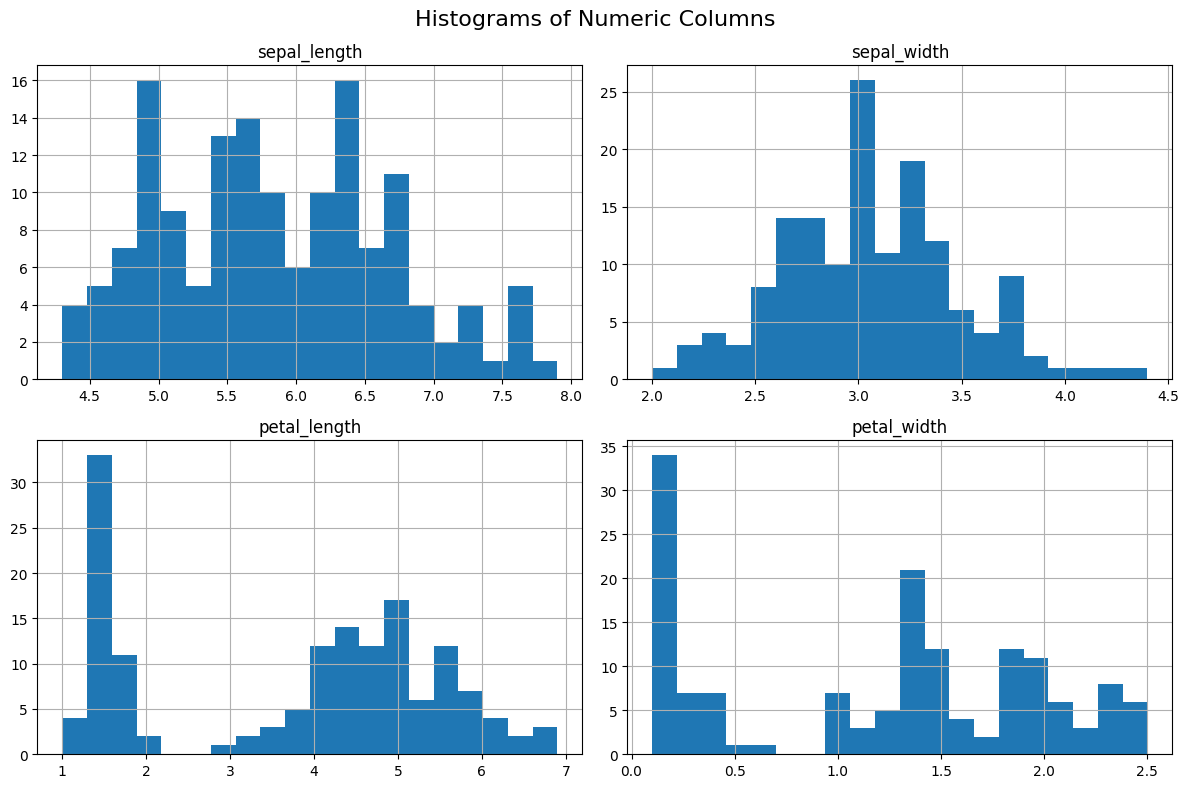

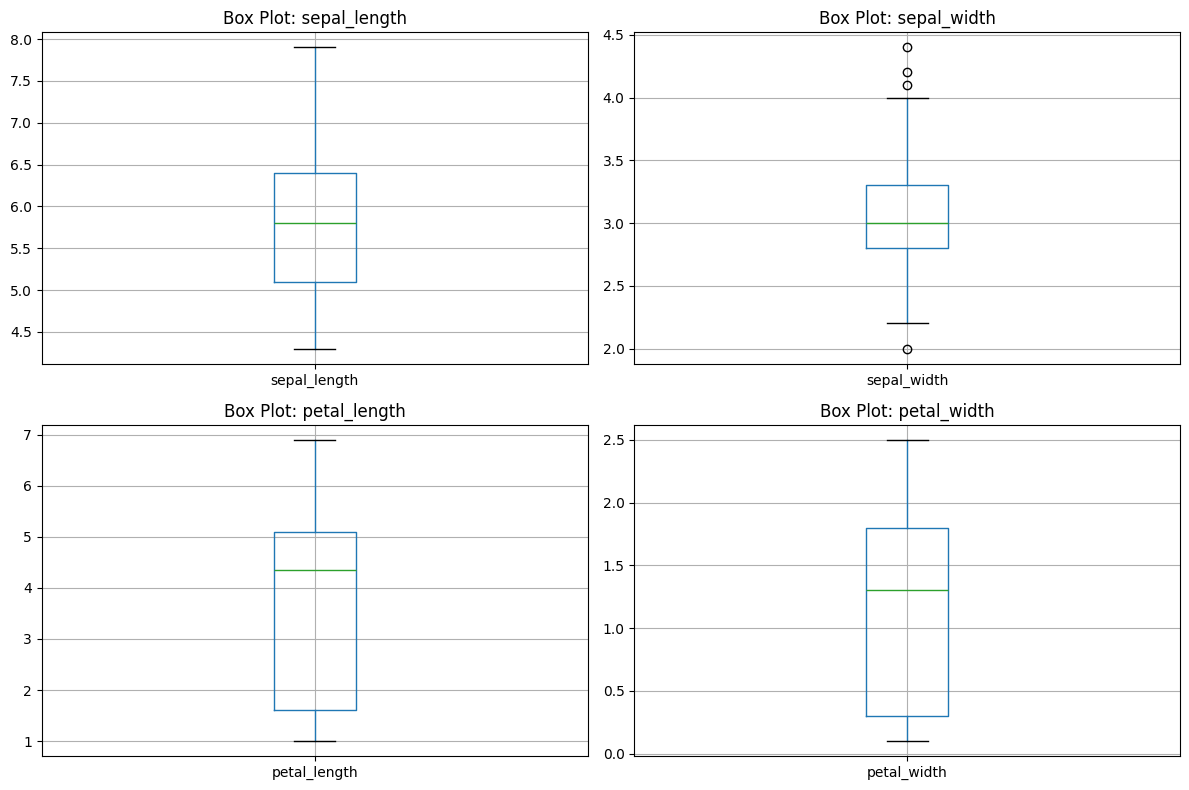

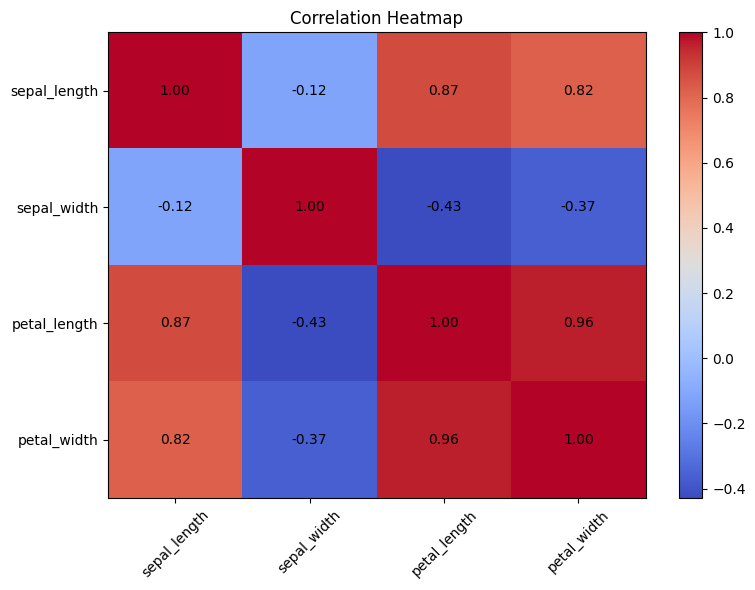

Visualization complete!


In [7]:
# Basic Data Visualization
print("Creating visualizations...")

# 1. Histograms for numeric columns
plt.figure(figsize=(12, 8))
df.hist(bins=20, figsize=(12, 8))
plt.suptitle('Histograms of Numeric Columns', fontsize=16)
plt.tight_layout()
plt.show()

# 2. Box plots for numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
if len(numeric_cols) > 0:
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    axes = axes.ravel()
    
    for i, col in enumerate(numeric_cols):
        if i < 4:  # Only plot first 4 numeric columns
            df.boxplot(column=col, ax=axes[i])
            axes[i].set_title(f'Box Plot: {col}')
    
    plt.tight_layout()
    plt.show()

# 3. Correlation heatmap (if there are numeric columns)
if len(numeric_cols) > 1:
    plt.figure(figsize=(8, 6))
    correlation_matrix = df[numeric_cols].corr()
    plt.imshow(correlation_matrix, cmap='coolwarm', aspect='auto')
    plt.colorbar()
    plt.title('Correlation Heatmap')
    plt.xticks(range(len(numeric_cols)), numeric_cols, rotation=45)
    plt.yticks(range(len(numeric_cols)), numeric_cols)
    
    # Add correlation values as text
    for i in range(len(numeric_cols)):
        for j in range(len(numeric_cols)):
            plt.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}', 
                    ha='center', va='center', color='black')
    
    plt.tight_layout()
    plt.show()

print("Visualization complete!")

## 6. Loading Additional Datasets from sklearn

In [9]:
# Load different datasets from sklearn
from sklearn.datasets import load_boston, load_diabetes, load_wine, load_breast_cancer

print("=== ADDITIONAL SKLEARN DATASETS ===")

# 1. Wine dataset
try:
    wine = load_wine()
    df_wine = pd.DataFrame(wine.data, columns=wine.feature_names)
    print("\n1. Wine Dataset:")
    print(f"Shape: {df_wine.shape}")
    print(f"Features: {wine.feature_names[:5]}...")  # Show first 5 features
    print(df_wine.head(3))
except:
    print("Wine dataset not available")

# 2. Breast Cancer dataset
try:
    cancer = load_breast_cancer()
    df_cancer = pd.DataFrame(cancer.data, columns=cancer.feature_names)
    print("\n2. Breast Cancer Dataset:")
    print(f"Shape: {df_cancer.shape}")
    print(f"Target classes: {cancer.target_names}")
    print(df_cancer.head(3))
except:
    print("Breast Cancer dataset not available")

# 3. Diabetes dataset
try:
    diabetes = load_diabetes()
    df_diabetes = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
    print("\n3. Diabetes Dataset:")
    print(f"Shape: {df_diabetes.shape}")
    print(f"Features: {diabetes.feature_names}")
    print(df_diabetes.head(3))
except:
    print("Diabetes dataset not available")

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


## Summary

This notebook demonstrated various methods to read and display datasets in Python:

1. **sklearn datasets** - Built-in datasets like Iris, Wine, Breast Cancer, Diabetes
2. **URL datasets** - Loading data directly from web URLs
3. **Local CSV files** - Reading from local file system
4. **Dataset analysis** - Comprehensive data exploration techniques
5. **Data visualization** - Basic plotting for data understanding

### Key Functions Used:
- `pd.read_csv()` - Read CSV files
- `df.head()`, `df.tail()` - View data samples
- `df.info()`, `df.describe()` - Dataset information
- `df.shape`, `df.columns` - Dataset structure
- `df.isnull().sum()` - Missing value analysis
- `df.hist()`, `plt.boxplot()` - Basic visualizations